In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

import statsmodels.api as sm

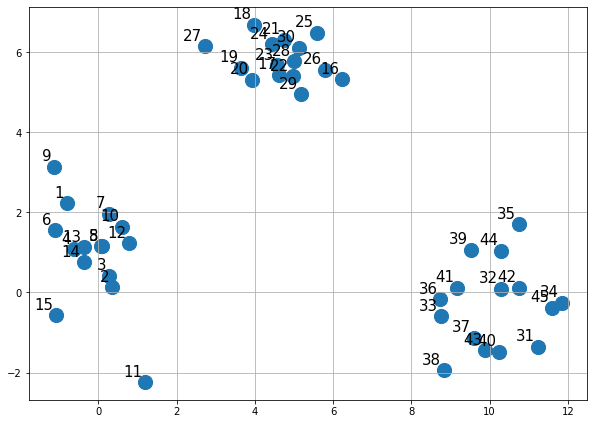

In [ ]:
# Hierarchical Clustering
# Dendrograms
def data_gen(n, fig=True):
    X1 = np.random.normal(1,1,n)-1
    Y1 = np.random.normal(1,1,n)

    X2 = np.random.normal(5,1,n)
    Y2 = np.random.normal(5,1,n)+1

    X3 = np.random.normal(10,1,n)
    Y3 = np.random.normal(10,1,n)-10

    X = np.concatenate([X1, X2, X3], axis=0)
    Y = np.concatenate([Y1, Y2, Y3], axis=0)

    labels = range(1,len(X)+1)

    if fig:
        plt.figure(figsize=(10,7))
        plt.subplots_adjust(bottom=0.1)
        plt.scatter(X, Y, s=200, label='True Position')

        for label, x, y in zip(labels, X, Y):
            plt.annotate(
                label,
                xy=(x, y),
                xytext=(-3,3),
                textcoords='offset points', ha='right', va='bottom',
                size=15)
        plt.grid()
    
    return X, Y, labels

## -- slide 7
n=15
data_gen(n);

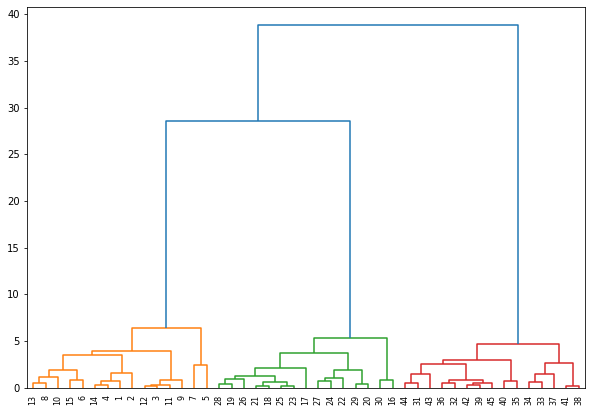

In [ ]:
# Dendrograms
# --slide 8
X,Y, labels = data_gen(n, fig=False);
y = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)], axis=1)
linked = linkage(y, method='ward')

labelList = labels

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True);

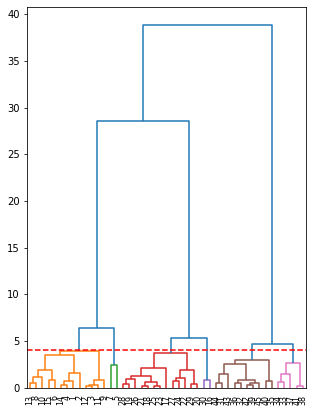

In [ ]:
# Draw the dendrogram with different threshold
y = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)], axis=1)
linked = linkage(y, method='ward')

def dend_thresh(linked, y, labels, th):
    labelList = labels
    plt.figure(figsize=(5, 7))
    dendrogram(linked,
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True,
                color_threshold=th);
    
    plt.axhline(y=th, color='r', linestyle='--')

dend_thresh(linked, y, labels, 4)

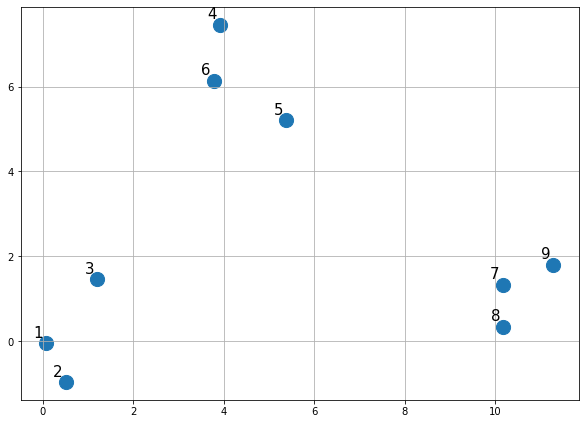

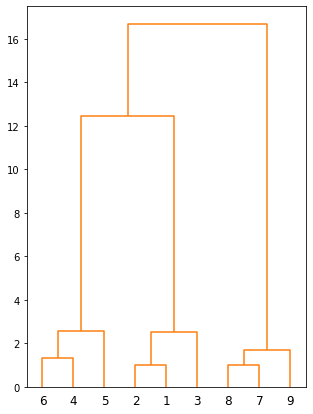

In [ ]:
# Dendrogram Interpretation
X, Y, labels = data_gen(3)
y = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)], axis=1)
linked = linkage(y, method='ward')
dend_thresh(linked, y, labels, th=20)

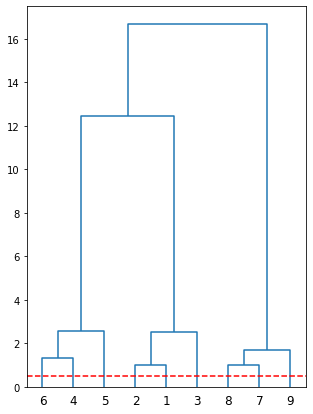

In [ ]:
dend_thresh(linked, y, labels, 0.5)

In [ ]:
# Distance matrix
# --slide 10 
df = pd.DataFrame(distance_matrix(X.reshape(-1,1), X.reshape(-1,1)))
df.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.440539,1.134749,3.846660,5.321477,3.709762,10.101598,10.122124,11.222355
1,0.440539,0.000000,0.694209,3.406121,4.880938,3.269223,9.661059,9.681585,10.781815
2,1.134749,0.694209,0.000000,2.711911,4.186728,2.575013,8.966849,8.987376,10.087606
3,3.846660,3.406121,2.711911,0.000000,1.474817,0.136898,6.254938,6.275464,7.375695
4,5.321477,4.880938,4.186728,1.474817,0.000000,1.611715,4.780121,4.800647,5.900878


Example data (purple rock crab)

The Leptograpsus variegatus, or purple rock crab, can take on a blue or orange coloring in some parts of
Australia. Campbell, N.A. and Mahon, R.J. (1974) collected 5 morphological measurements on 200 crabs from the
species Leptograpsus variegatus. These are recorded in the crabs dataset in the MASS python and R packages.

• columns
– sp B=blue, O=orange

– sex M=male, F=female

– FL, RW, CL, CW, BD morphological measurements – index not important for us

In [ ]:
# Load the crab data set
crabs = sm.datasets.get_rdataset('crabs','MASS').data # get crabs data
crabsX = crabs.iloc[:,3::] # extract featrues (suppose we only know this information)
crabsY = crabs.iloc[:,0:2] # get true labels

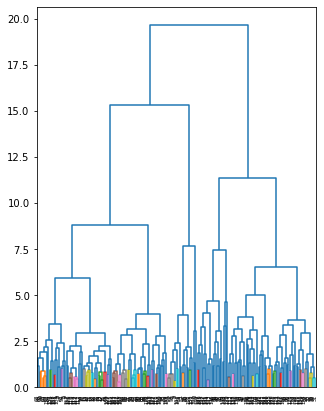

In [ ]:
linked = linkage(crabsX, metric="euclidean", method="average")

plt.figure(figsize=(5,7))
dn = dendrogram(linked, orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=1);



(0.0, 50.0)

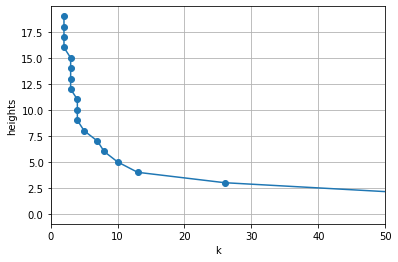

In [ ]:
# --slide 25
hegits = np.arange(0, 20)
n_clusters = np.zeros(len(hegits))
linked = linkage(crabsX, metric="euclidean", method="average")

for i, d in enumerate(hegits):
    t = cut_tree(linked, height=d)
    n_clusters[i] = len(np.unique(t))

plt.plot(n_clusters, hegits, '-o')
plt.grid()
plt.xlabel('k')
plt.ylabel('heights')
plt.xlim([0, 50])

(0.0, 50.0)

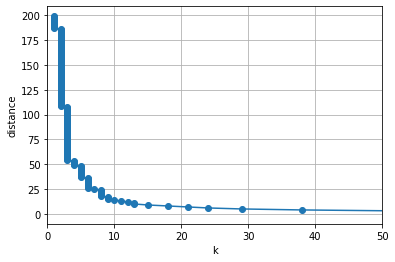

In [ ]:
# select the number of clustter, K
#cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#cluster.fit(crabsX)

dists = np.arange(0,200)
n_clusters = np.zeros(len(heights))
for i, d in enumerate(dists):
    cluster = AgglomerativeClustering(distance_threshold=d, n_clusters=None, affinity='euclidean', linkage='ward')
    cluster.fit(crabsX)
    n_clusters[i] = cluster.n_clusters_

plt.plot(n_clusters, dists, '-o')
plt.grid()
plt.xlabel('k')
plt.ylabel('distance')
plt.xlim([0, 50])


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b73f9a-5dd8-43d6-99ee-0bde04bee819' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>